In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
user_data = pd.read_csv('3_user_data.csv')
logs = pd.read_csv('3_logs.csv')

In [3]:
user_data.tail()

,client,premium,age
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46
2953,78499,False,36


In [4]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [5]:
# Узнаем какие значения принимает поле platform в датасете logs
logs.platform.unique()

array(['phone', 'computer', 'tablet'], dtype=object)

In [6]:
# Найдем клиентов с самым большим количеством успешных операций
logs_success_client = logs \
    .query('success==True') \
    .groupby('client') \
    .agg({'platform':'count'}) \
    .sort_values('platform', ascending=False) \
    .head(9) \
    .reset_index() \
    .rename(columns={'platform':'successful_operations'}) \
    .sort_values('client')

logs_success_client

,client,successful_operations
0,12179,41
8,28719,41
7,36165,41
2,52870,41
1,61468,41
3,61473,41
6,78349,41
5,82563,41
4,92584,41


In [7]:
# Создадим цикл, чтобы вывести идентификаторы клиентов в списке
lst = []
for i in logs_success_client.client:
    lst.append(i)
lst

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [8]:
# Выведем максимальное количество успешных операций по платформам
logs \
    .query('success == True') \
    .groupby(['platform'], as_index=False) \
    .agg({'client':'count'}) \
    .rename(columns={'client':'amount_success'}) \
    .sort_values('amount_success', ascending=False) \
    .head(1)

,platform,amount_success
1,phone,2019


In [9]:
# Создадим объединенный дадасет из user_data
logs_and_user_data = logs.merge(user_data, on='client')
logs_and_user_data

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [10]:
# Выведем количество операций по платформам среди премиумных клиентов
logs_and_user_data \
    .query('premium == True') \
    .groupby('platform') \
    .agg({'client':'count'}) \
    .rename(columns={'client':'amount_operations'}) \
    .sort_values('amount_operations', ascending=False)

,amount_operations
platform,
phone,246
computer,150
tablet,24


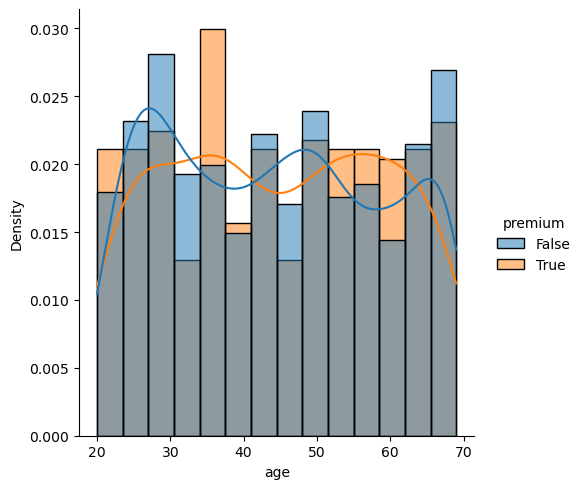

In [11]:
# Визуализируем распределение возраста по пермиумным и обычным клиентам
sns.displot(data=logs_and_user_data, x='age', hue='premium', 
            kde=True, kind='hist', stat='density', common_norm=False, bins=14)

In [12]:
# Создадим пандовскую серию с количеством успешных операций по клиентам
success_operations = logs \
    .query('success==True') \
    .client.value_counts()

# Переименуем пандовскую серию
success_operations = success_operations.rename('successful operations')

# Визуализируем число успешных операций 
sns.countplot(x = success_operations)

<AxesSubplot:xlabel='successful operations', ylabel='count'>

In [13]:
# Выведем датафрейм с количеством успешных операция с платформы computer
success_operations_computer = logs_and_user_data.query('platform=="computer" & success ==True')
success_operations_computer

,client,success,platform,time,premium,age
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
7,61468,True,computer,1585416826,False,25
11,61468,True,computer,1585428874,False,25
...,...,...,...,...,...,...
3409,4293,True,computer,1585403129,False,29
3425,16540,True,computer,1585456144,False,49
3432,85769,True,computer,1585447052,False,46
3433,81031,True,computer,1585401631,False,45
